In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 1 _ Bonato Angela

## Esercizio 1.1

L'esercizio richiedeva di testare la bontà del generatore di numeri pseudo-casuali usato durante il corso, verificando il comportamento dei numeri generati rispetto ad alcune grandezze statistiche: valor medio, varianza e $\chi ^2$.

### Valor medio

Innanzitutto, ho effettuato una stima con errore del valor medio $\langle r \rangle$ di una serie di $M$ numeri reali $r \in [0,1)$ generati in maniera pseudo-casuale, da confrontarsi con la previsione teorica $\langle r \rangle_\mathrm{t} = \int_0^1 r dr = \frac{1}{2}$ . Ho ottenuto la stima dell'errore mediante il metodo della media a blocchi, effettuando l'analisi su $M=10^4$ numeri divisi in $N=100$ blocchi. 

Il risultato ottenuto all'ultimo blocco è compatibile con la previsione teorica entro $1 \sigma$ , come mostrato dal seguente plot.

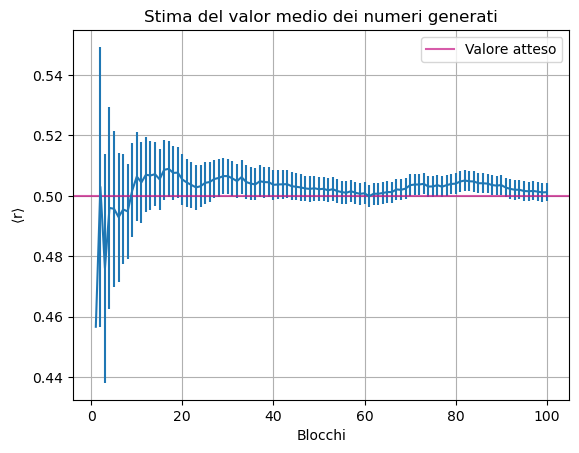

In [3]:
Mav=10000  #numero totale di estrazioni del generatore
Nav=100  #numero di blocchi
Lav=int(Mav/Nav)  #numero di estrazioni per blocco
avx=np.arange(Nav)+1  #vettore delle ascisse dei punti plottati

#vettori delle ordinate dei punti plottati e delle barre d'errore
ay, aerrorbars=np.loadtxt("average.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  

plt.errorbar(avx, ay, yerr=aerrorbars)
plt.axhline(y=0.5, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Blocchi")
plt.ylabel(r"$\left<\mathrm{r}\right>$")
plt.title(r"Stima del valor medio dei numeri generati")
plt.grid(True)
plt.legend()
plt.show()

### Varianza

Per ognuno dei numeri generati, ho calcolato la varianza $\sigma^2= \left( r- \langle r \rangle_\mathrm{t} \right) ^2$ e ho confrontato il suo valor medio - con errore dato dal metodo della media a blocchi - con il valore teorico $\langle \sigma^2 \rangle_\mathrm{t}= \int_0^1 (r-\frac{1}{2})^2 dr = \frac{1}{12}$. Anche in questo caso il risultato all'ultimo blocco è compatibile con il valore atteso entro $1 \sigma$.

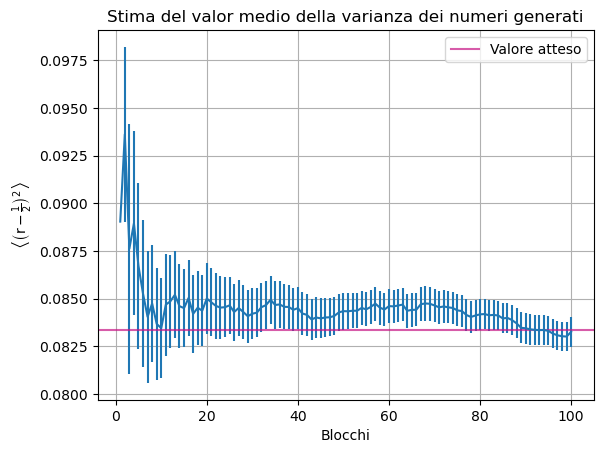

In [3]:
#vettore delle ordinate dei punti plottati e relativi errori
vy, verrorbars=np.loadtxt("variance.dat", delimiter=" ", usecols=(0,1),  unpack="true")  

plt.errorbar(avx, vy, yerr=verrorbars)
plt.axhline(y=1/12, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Blocchi")
plt.ylabel(r"$\left< \left( \mathrm{r}-\frac{1}{2} \right) ^2 \right> $")
plt.title(r"Stima del valor medio della varianza dei numeri generati")
plt.grid(True)
plt.legend()
plt.show()

### Chi quadro

Per valutare l'effettiva uniformità della distribuzione dei numeri pseudo-casuali prodotti dal generatore, è stato richiesto il test del $\chi^2$. Ho diviso $[0,1)$ in $I=100$ sottointervalli uguali, per ognuno di questi ho estratto $J=10^4$ numeri pseudo-casuali in $[0,1)$ e, mediante il calcolo del $\chi^2$, ho confrontato quanti di questi cadevano nel sottointervallo considerato con il valore atteso per una distribuzione uniforme (pari a $\frac{J}{I}=100$). 

Dopo aver ripetuto il caclolo per ogni sottointervallo, ho plottato i risultati ottenuti. Inoltre, raccogliendoli in un istogramma normalizzato, ho verificato  che i valori calcolati rispettassero la distribuzione di probabilità attesa per $\chi^2$. 

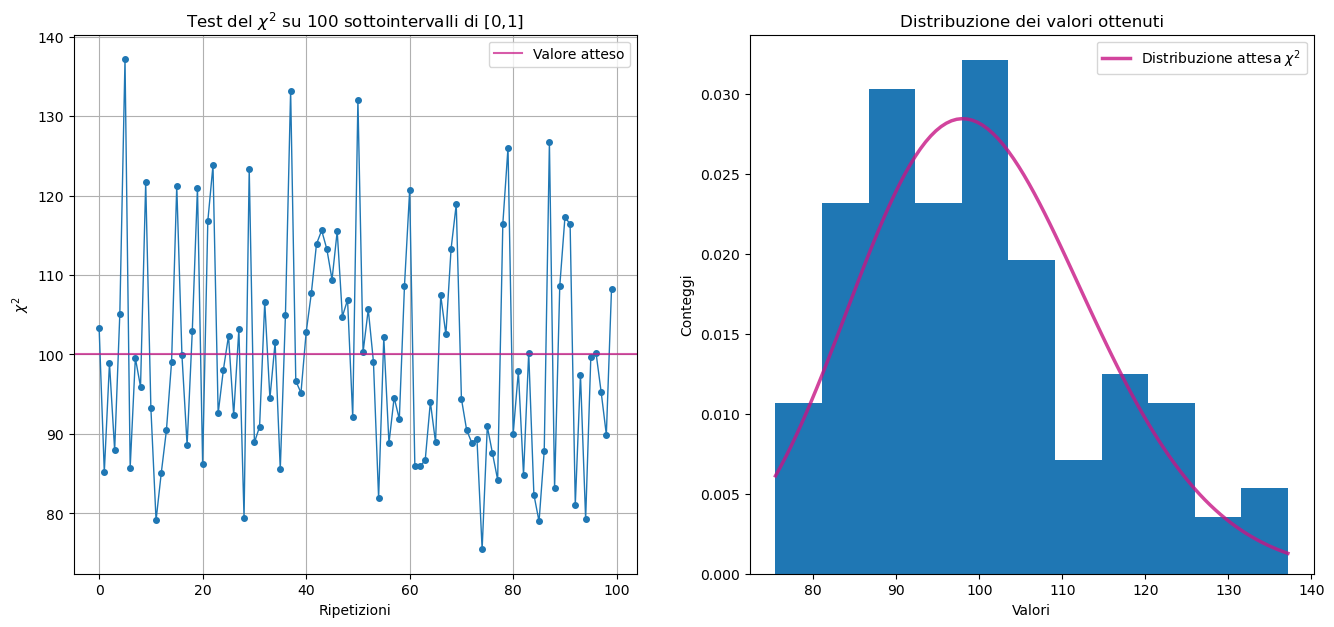

In [4]:
Mchi=100  #numero intervalli considerati
cx=np.arange(Mchi)  #vettore con le ascisse del plot
cy=np.loadtxt("chiquad.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore con le ordinate del plot

dx=np.linspace(min(cy), max(cy), num=100)  #vettore per plottare il fit della distribuzione del chi2
cmean=100

fig ,(plt1, plt2) = plt.subplots(1, 2, figsize=(16, 7))

plt1.plot(cx, cy, marker='o', markersize=4, linewidth=1)
plt1.axhline(y=cmean, color="mediumvioletred", label="Valore atteso", alpha=0.7, linewidth=1.5)
plt1.set_xlabel("Ripetizioni")
plt1.set_ylabel(r"$\chi^2$")
plt1.set_title(r"Test del $\chi^2$ su 100 sottointervalli di [0,1]")
plt1.grid(True)
plt1.legend()

plt2.hist(cy, bins=11, density=True)
plt2.set_xlabel("Valori")
plt2.set_ylabel("Conteggi")
plt2.set_title("Distribuzione dei valori ottenuti")
plt2.plot(dx, chi2.pdf(dx, cmean), label=r"Distribuzione attesa $\chi^2$", color="mediumvioletred", linewidth=2.5, alpha=0.8)
plt2.legend()

plt.show()

## Esercizio 1.2

La consegna di questo esercizio chiedeva di verificare il Teorema del Limite Centrale per tre diverse distribuzioni di probabilità: uniforme, esponenziale e Cuchy-Lorentz. Per ognuna di queste, ho calcolato $M=10^4$ volte la somma $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (con $N=1, 2, 10, 100$) di variabili $x_i$ pseudo-casuali distribuite secondo la probabilità di volta in volta analizzata.

### Distribuzione uniforme

In questo primo caso, per generare $x_i$ ho usato il generatore pseudo-casuale nella sua funzione più semplice, come fatto negli esercizi precedenti. Al variare di $N$, ho plottato l'istogramma dei valori di $S_N$ ottenuti. Come atteso, per $N=1$ la distribuzione è approssimativamente uniforme, mentre tende a diventare Gaussiana al crescere di $N$.

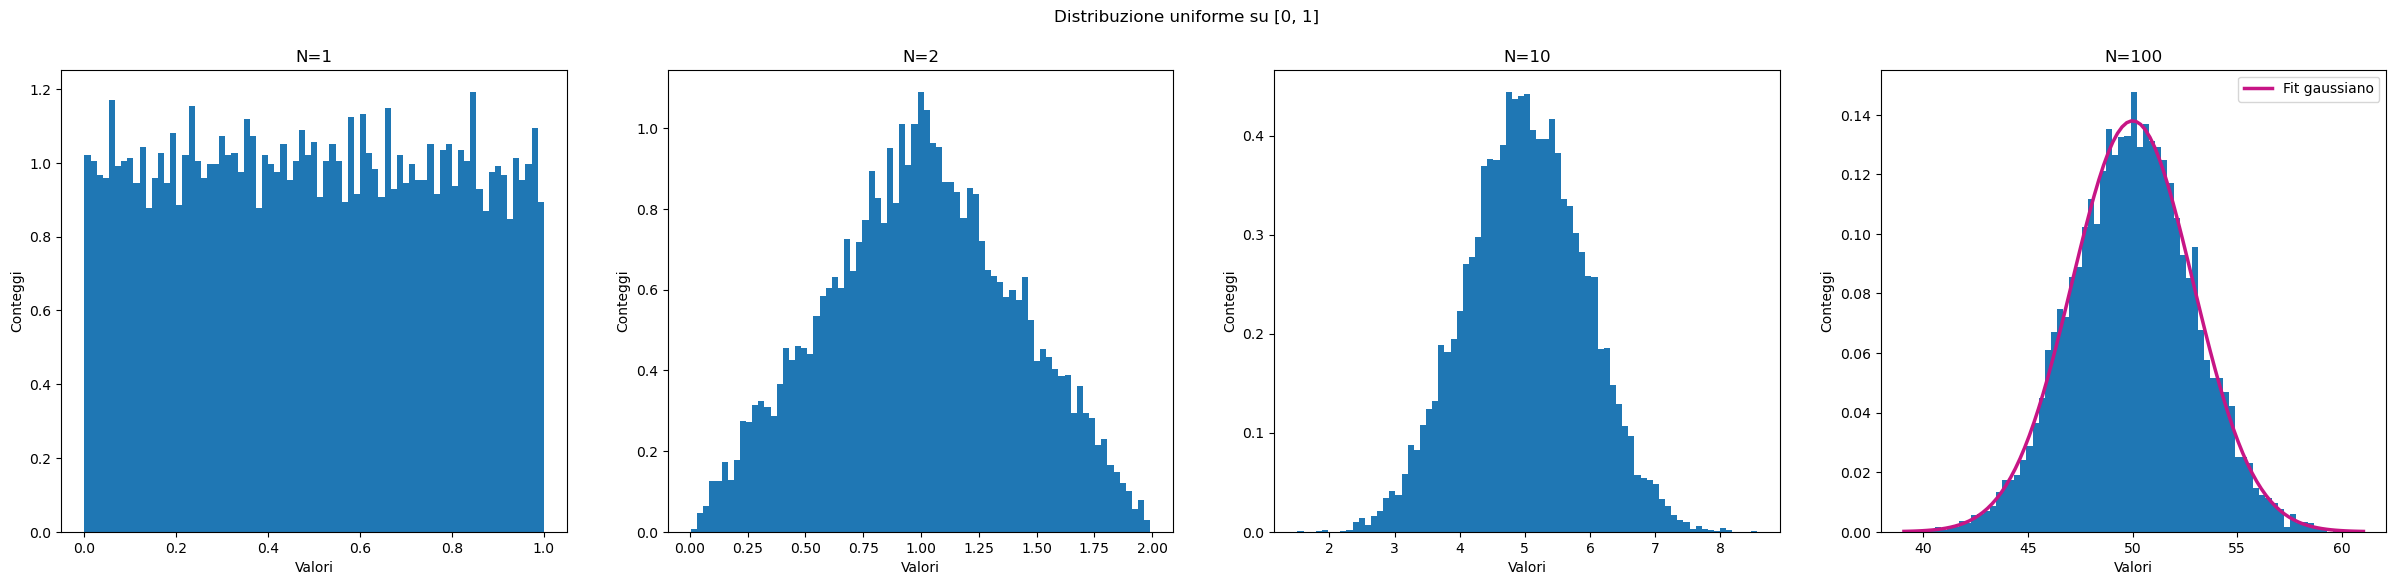

In [5]:
Bdist=75  #numero bin istogrammi
U1s, U2s, U3s, U4s=np.loadtxt("unifdist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(umu, usigma)=norm.fit(U4s)  #preparo il fit gaussiano per la figura con N=100
ufx=np.linspace(min(U4s), max(U4s), 100)

ufig ,(uax1, uax2, uax3, uax4) = plt.subplots(1, 4, figsize=(30, 6))

uax1.hist(U1s, bins=Bdist, density=True)
uax1.set_xlabel("Valori")
uax1.set_ylabel("Conteggi")
uax1.set_title("N=1")

uax2.hist(U2s, bins=Bdist, density=True)
uax2.set_xlabel("Valori")
uax2.set_ylabel("Conteggi")
uax2.set_title("N=2")

uax3.hist(U3s, bins=Bdist, density=True)
uax3.set_xlabel("Valori")
uax3.set_ylabel("Conteggi")
uax3.set_title("N=10")

uax4.hist(U4s, bins=Bdist, density=True)
uax4.set_xlabel("Valori")
uax4.set_ylabel("Conteggi")
uax4.set_title("N=100")
uax4.plot(ufx, norm.pdf(ufx, umu, usigma), label=r"Fit gaussiano", color="mediumvioletred", linewidth=2.5)
uax4.legend()

ufig.suptitle("Distribuzione uniforme su [0, 1]")
plt.show()

### Distribuzione esponenziale

A partire da numeri $r \in [0,1)$ generati in maniera pseudo-casuale, ho implementato nel codice del generatore il metodo dell'inversione della cumulativa per ottenere valori $x_i$ distribuiti secondo una distribuzione $p(x)=\lambda exp(-\lambda x)$ con $\lambda=1$. Poi, come fatto in precedenza, ho realizzato gli istogrammi dei valori di $S_N$ calcolati al variare di $N$. Anche in questo caso, la distribuzione esponenziale ottenuta per $N=1$ tende ad una Gaussiana al crescere del parametro.

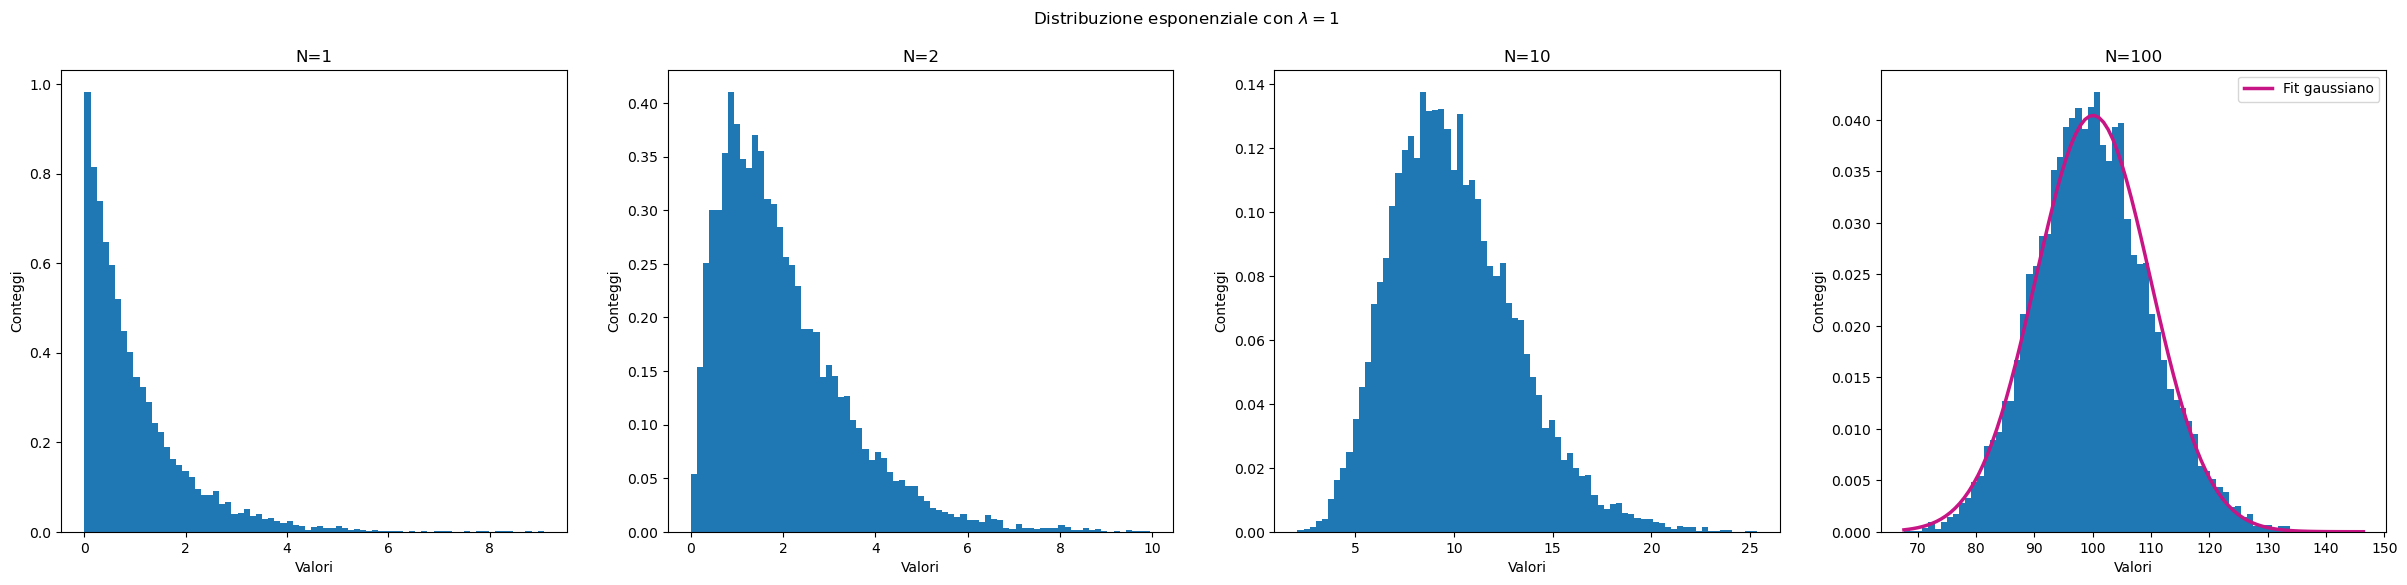

In [6]:
E1s, E2s, E3s, E4s=np.loadtxt("expdist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(emu, esigma)=norm.fit(E4s)  #preparo il fit gaussiano per la figura con N=100
efx=np.linspace(min(E4s), max(E4s), 100)

efig ,(eax1, eax2, eax3, eax4) = plt.subplots(1, 4, figsize=(30, 6))

eax1.hist(E1s, bins=Bdist, density=True)
eax1.set_xlabel("Valori")
eax1.set_ylabel("Conteggi")
eax1.set_title("N=1")

eax2.hist(E2s, bins=Bdist, density=True)
eax2.set_xlabel("Valori")
eax2.set_ylabel("Conteggi")
eax2.set_title("N=2")

eax3.hist(E3s, bins=Bdist, density=True)
eax3.set_xlabel("Valori")
eax3.set_ylabel("Conteggi")
eax3.set_title("N=10")

eax4.hist(E4s, bins=Bdist, density=True)
eax4.set_xlabel("Valori")
eax4.set_ylabel("Conteggi")
eax4.set_title("N=100")
eax4.plot(efx, norm.pdf(efx, emu, esigma), label=r"Fit gaussiano", color="mediumvioletred", linewidth=2.5)
eax4.legend()

efig.suptitle(r"Distribuzione esponenziale con $\lambda=1$")
plt.show()

### Distribuzione Cauchy-Lorentz

Dopo aver implementato nel codice del generatore il metodo dell'inversione della cumulativa per ottenere valori $x_i$ distribuiti secondo $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, ho realizzato gli istogrammi richiesti nel caso $\mu=0$ e $\Gamma=1$. Come atteso, in questo caso, al crescere di $N$ la distribuzione ottenuta non tende ad una Gaussiana ma resta un'approssimazione (sempre migliore) della curva Lorentziana.

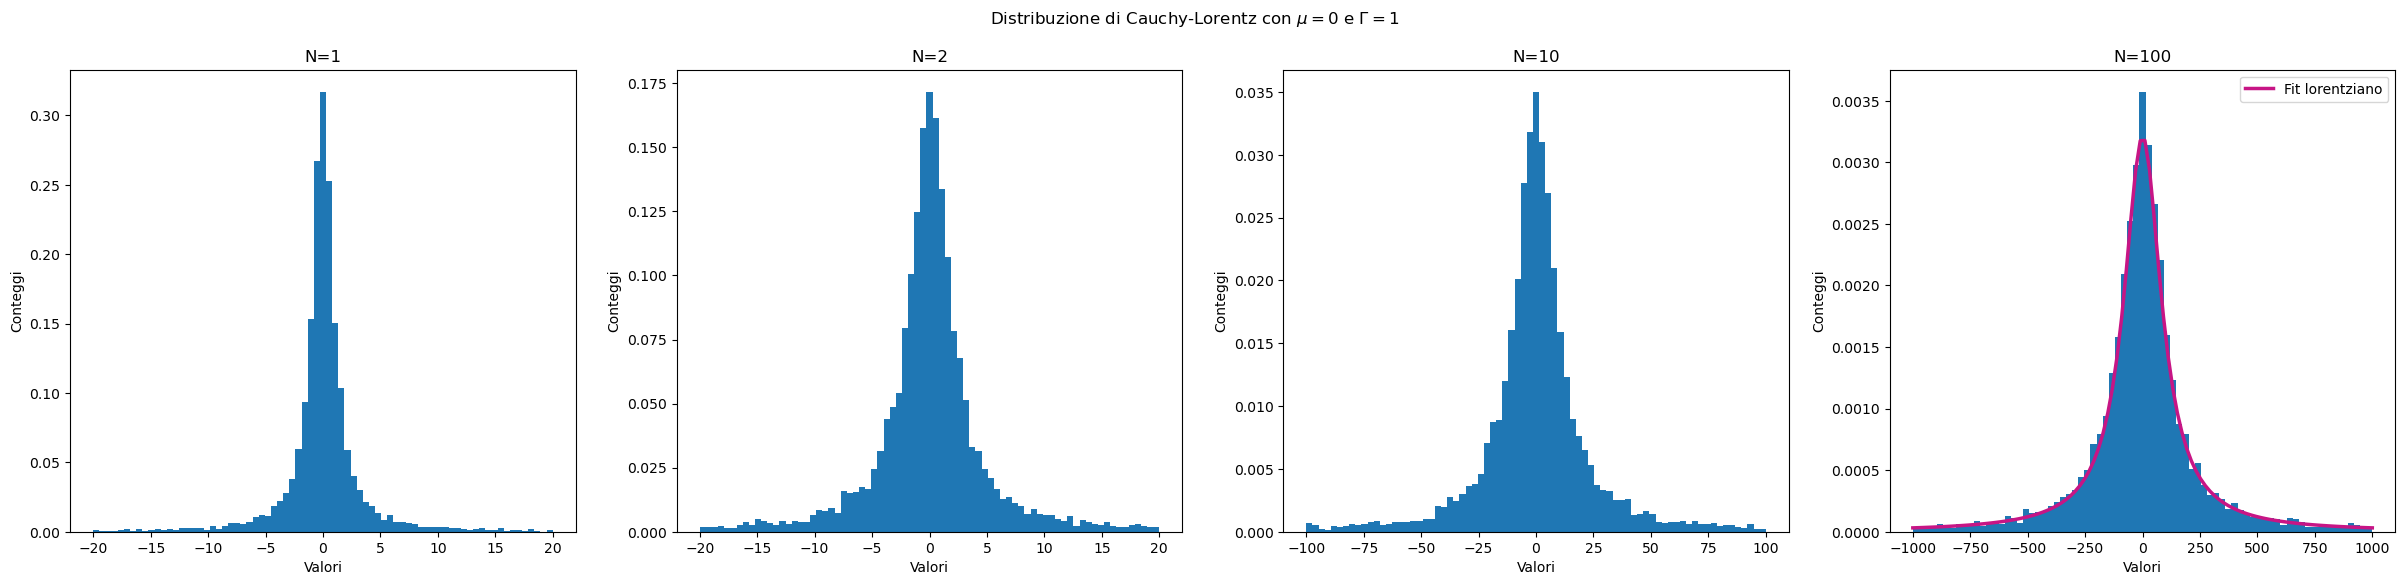

In [7]:
L1s, L2s, L3s, L4s=np.loadtxt("lordist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(lmu, lgamma)=cauchy.fit(L4s)  #preparo il fit lorentziano per la figura con N=100
lfx=np.linspace(-1000, 1000, 100)

lfig ,(lax1, lax2, lax3, lax4) = plt.subplots(1, 4, figsize=(30, 6))

lax1.hist(L1s, bins=Bdist, density=True, range=(-20, 20))
lax1.set_xlabel("Valori")
lax1.set_ylabel("Conteggi")
lax1.set_title("N=1")

lax2.hist(L2s, bins=Bdist, density=True, range=(-20, 20))
lax2.set_xlabel("Valori")
lax2.set_ylabel("Conteggi")
lax2.set_title("N=2")

lax3.hist(L3s, bins=Bdist, density=True, range=(-100, 100))
lax3.set_xlabel("Valori")
lax3.set_ylabel("Conteggi")
lax3.set_title("N=10")

lax4.hist(L4s, bins=Bdist, density=True, range=(-1000, 1000))
lax4.set_xlabel("Valori")
lax4.set_ylabel("Conteggi")
lax4.set_title("N=100")
lax4.plot(lfx, cauchy.pdf(lfx, lmu, lgamma), label=r"Fit lorentziano", color="mediumvioletred", linewidth=2.5)
lax4.legend()

lfig.suptitle(r"Distribuzione di Cauchy-Lorentz con $\mu=0$ e $\Gamma=1$")
plt.show()

## Esercizio 1.3

Da ultimo, era richiesta una stima del valore di $\pi$ tramite il metodo dell'ago di Buffon. 

Ho simulato $M=10^5$ lanci di un ago di lunghezza $l=0.55$ in un piano con ordinate $y\in[0,2)$, su cui erano posizionate due linee orizzontali in corrispondenza di $y=0$ e $y=1$. Per simulare la posizione dell'ago rispetto all'asse $x$ nel piano dopo ogni tiro, ho generato valori dell'angolo $\theta \in [-\frac{\pi}{2},\frac{\pi}{2}]$ fra essi compreso, utilizzando il metodo accept&reject descritto a lezione.

Ho realizzato l'analisi dividendo i lanci in $N=100$ blocchi, per ognuno dei quali ho calcolato il valor medio e l'errore a blocchi della costante richiesta. Il risultato ottenuto risulta compatibile con il valore teorico entro $2 \sigma$.

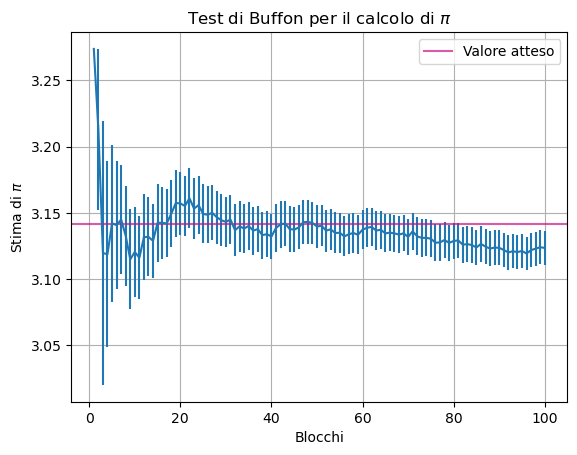

In [8]:
Mb=100000  #numero totale di estrazioni del generatore
Bb=100  #numero di blocchi
Tb=int(Mb/Bb)  #numero di estrazioni per blocco
bx=np.arange(Bb)+1  #vettore delle ascisse dei punti plottati

#vettori delle ordinate e delle barre d'errore dei punti plottati
by, berrorbars=np.loadtxt("buffon.dat", delimiter=" ", usecols=(0, 1),  unpack="true")

plt.errorbar(bx, by, yerr=berrorbars)
plt.axhline(y=math.pi, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Blocchi")
plt.ylabel(r"Stima di $\pi$")
plt.title(r"Test di Buffon per il calcolo di $\pi$")
plt.grid(True)
plt.legend()
plt.show()